In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

## Problem 1: NYC Restaurants Dataset

In [4]:
# Load the data into a DataFrame
nyc = pd.read_csv('nyc.txt', delimiter='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [5]:
# Create feature array X1 and label array y1
X1 = nyc[['Food', 'Decor', 'Service', 'Wait', 'East']].values
y1 = nyc['Price'].values

In [6]:
# Create feature array X1 and label array y1
X1 = nyc[['Food', 'Decor', 'Service', 'Wait', 'East']].values
y1 = nyc['Price'].values

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Print the shapes of X_train_1 and X_test_1
print(f"Training Features Shape:{X_train_1.shape}", )
print(f"Test Features Shape:{X_test_1.shape}")

Training Features Shape:(134, 5)
Test Features Shape:(34, 5)


In [7]:
# Create and fit the linear regression model
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

# Display the intercept and coefficients of the model
print(f"Intercept:{nyc_mod.intercept_}")
print(f"Coefficients:{nyc_mod.coef_}")

Intercept:-23.755435322488893
Coefficients:[ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [8]:
# Calculate and print the r-squared scores
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)
print(f'Training r-Squared: {train_r2:.4f}')
print(f'Testing r-Squared:  {test_r2:.4f}')


Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [9]:
# Generate price estimates for the test set
test_pred_1 = nyc_mod.predict(X_test_1)

# Print the observed and estimated prices for the test set
print(f'Observed Prices:  {y_test_1[:10]}')
print(f'Estimated Prices: {test_pred_1[:10].round(2)}')


Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [10]:
# Create DataFrame for new restaurants
new_data = np.array([[22, 12, 20, 15, 0], 
                     [18, 19, 22, 34, 1], 
                     [25, 22, 18, 36, 0]])

nyc_new = pd.DataFrame(new_data, columns=['Food', 'Decor', 'Service', 'Wait', 'East'])
new_pred_1 = nyc_mod.predict(nyc_new.values)
print(f"Estimated Prices: {new_pred_1.round(2)}")

Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [12]:
# Load the data into a DataFrame
diamonds = pd.read_csv('diamonds.txt', delimiter='\t')

# Display the first 5 rows of the DataFrame
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
# Add columns for natural logarithm of carat and price
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

# Display the first 5 rows with new columns
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


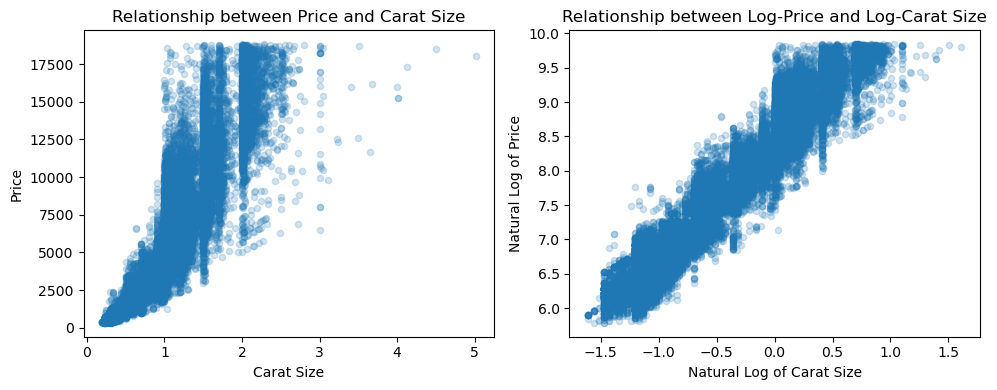

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot for carat vs price
axes[0].scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.2)
axes[0].set_title("Relationship between Price and Carat Size")
axes[0].set_xlabel("Carat Size")
axes[0].set_ylabel("Price")

# Scatter plot for ln_carat vs ln_price
axes[1].scatter(diamonds['ln_carat'], diamonds['ln_price'], s=20, alpha=0.2)
axes[1].set_title("Relationship between Log-Price and Log-Carat Size")
axes[1].set_xlabel("Natural Log of Carat Size")
axes[1].set_ylabel("Natural Log of Price")

plt.tight_layout()
plt.show()

In [15]:
# Prepare feature and label arrays
X2 = diamonds[['ln_carat']].values
y2 = diamonds['ln_price'].values

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)

# Print the shapes of X_train_2 and X_test_2
print(f'Training Features Shape: {X_train_2.shape}')
print(f'Test Features Shape:     {X_test_2.shape}')

Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [16]:
# Create and fit the linear regression model
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

# Display the intercept and coefficients of the model
print(f'Intercept:    {dia_mod.intercept_}')
print(f'Coefficients: {dia_mod.coef_}')

Intercept:    8.448298621179152
Coefficients: [1.67493107]


In [17]:
# Calculate and print the r-squared scores
train_r2_2 = dia_mod.score(X_train_2, y_train_2)
test_r2_2 = dia_mod.score(X_test_2, y_test_2)
print(f'Training r-Squared: {train_r2_2:.4f}')
print(f'Testing r-Squared:  {test_r2_2:.4f}')

Training r-Squared: 0.9330
Testing r-Squared:  0.9328


In [18]:
# Generate price estimates for the test set
test_pred_2 = np.exp(dia_mod.predict(X_test_2))  # Convert log prices back to prices
y_test_prices = np.exp(y_test_2)  # Convert log prices back to prices

print(f'Observed Prices:  {y_test_prices[:10].round()}')
print(f'Estimated Prices: {test_pred_2[:10].round()}')

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 729. 6334. 2096.  766. 6334. 1612. 5309. 1048. 9204.  804.]


In [19]:
# Create a column array for new carat sizes
carat_sizes = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0]).reshape(-1, 1)
diamonds_new = np.log(carat_sizes)  # Log-transform carat sizes
new_pred_2 = np.exp(dia_mod.predict(diamonds_new))  # Get price estimates

print(f'Estimated Prices: {new_pred_2.round()}')

Estimated Prices: [ 1462.  4667.  9204. 14902. 21656. 29390.]


## Problem 3: Heart Disease Dataset

In [21]:
# Load the data into a DataFrame
hd = pd.read_csv('heart_disease.txt', delimiter='\t')
# Display the first 10 rows of the DataFrame
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [22]:
# Create feature and label arrays
X3 = hd.drop(columns='heart_disease').values  # 2D feature array
y3 = hd['heart_disease'].values  # 1D label array

# Split the data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1, stratify=y3)

# Print the shapes of X_train_3 and X_test_3
print(f'Training Features Shape: {X_train_3.shape}')
print(f'Test Features Shape:     {X_test_3.shape}')


Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)


In [23]:
# Scale the features
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

# Create and fit the logistic regression model
hd_mod = LogisticRegression(solver='lbfgs', penalty=None, max_iter=1000)
hd_mod.fit(X_train_3, y_train_3)

# Display the intercept and coefficients of the model
print(f'Intercept:    {hd_mod.intercept_}')
print(f'Coefficients: \n{hd_mod.coef_}')

Intercept:    [-0.29296155]
Coefficients: 
[[-0.30214871  0.86054858  0.72443234  0.45471415  0.69233651 -0.25947101
   0.32234143 -0.43048757  0.34042994  0.42310253  0.17543602  1.03276186
   0.74600459]]


In [24]:
# Calculate and print the accuracy scores
train_acc_3 = hd_mod.score(X_train_3, y_train_3)
test_acc_3 = hd_mod.score(X_test_3, y_test_3)
print(f'Training Accuracy: {train_acc_3:.4f}')
print(f'Testing Accuracy:  {test_acc_3:.4f}')

Training Accuracy: 0.8472
Testing Accuracy:  0.8148


In [25]:
# Generate label predictions for the test set
test_pred_3 = hd_mod.predict(X_test_3)

# Print the observed and predicted labels for the test set
print(f'Observed Labels:  {y_test_3[:20]}')
print(f'Predicted Labels: {test_pred_3[:20]}')

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [26]:
prob_pred_3 = pd.DataFrame(hd_mod.predict_proba(X_test_3[:10]), columns=['No Heart Disease (1)', 'Heart Disease (2)'])
print(prob_pred_3)

   No Heart Disease (1)  Heart Disease (2)
0              0.011695           0.988305
1              0.043212           0.956788
2              0.039923           0.960077
3              0.847659           0.152341
4              0.874035           0.125965
5              0.052113           0.947887
6              0.920281           0.079719
7              0.944954           0.055046
8              0.009947           0.990053
9              0.996715           0.003285


## Problem 4: Gapminder Dataset

In [28]:
# Load the data into a DataFrame
gm = pd.read_csv('gapminder_data.txt', delimiter='\t')

# Filter the DataFrame for 2018 results
gm18 = gm[gm['year'] == 2018]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [29]:
# Create feature array X4 and label array y4
X4 = gm18[['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18['continent'].values

# Split the data into training and testing sets using stratified sampling
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.3, random_state=1, stratify=y4)

# Print the shapes of X_train_4 and X_test_4
print(f'Training Features Shape: {X_train_4.shape}')
print(f'Test Features Shape:     {X_test_4.shape}')

Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


In [30]:

# Scale the features
scaler = StandardScaler()
X_train_4 = scaler.fit_transform(X_train_4)
X_test_4 = scaler.transform(X_test_4)

# Create and fit the logistic regression model
gm_mod = LogisticRegression(solver='lbfgs', penalty=None, multi_class='multinomial', max_iter=1000)
gm_mod.fit(X_train_4, y_train_4)

# Display the intercept and coefficients of the model
print(f'Intercept:    {gm_mod.intercept_}')
print(f'Coefficients: \n{gm_mod.coef_}')

Intercept:    [ 0.3194744  -0.44310088  1.34538333 -1.22175685]
Coefficients: 
[[-2.22901272 -0.28556531  0.81919864]
 [ 1.5314049  -0.54534107  2.02209146]
 [-1.25480672  0.74985014 -0.48785055]
 [ 1.95241454  0.08105623 -2.35343956]]


In [31]:
# Calculate and print the accuracy scores
train_acc = gm_mod.score(X_train_4, y_train_4)
test_acc = gm_mod.score(X_test_4, y_test_4)
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Testing Accuracy:  {test_acc:.4f}')

Training Accuracy: 0.7188
Testing Accuracy:  0.6786


In [32]:
# Generate label predictions for the test set
test_pred_4 = gm_mod.predict(X_test_4)

# Print the observed and predicted labels for the test set
print(f'Observed Labels:  {y_test_4[:8]}')
print(f'Predicted Labels: {test_pred_4[:8]}')

# Estimate probabilities for the first 10 observations
probs = gm_mod.predict_proba(X_test_4)
pd.DataFrame(probs[:10], columns=['africa', 'americas', 'asia', 'europe'])

Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['americas' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


,africa,americas,asia,europe
0,0.065526,0.475764,0.309639,0.149071
1,0.002663,0.073182,0.112513,0.811641
2,0.817880,0.000143,0.181927,0.000050
3,0.309194,0.089242,0.561637,0.039927
4,0.002244,0.002981,0.064945,0.929830
5,0.013345,0.007845,0.339346,0.639464
6,0.720009,0.010162,0.268955,0.000874
7,0.000101,0.000447,0.015334,0.984118
8,0.008695,0.003077,0.252871,0.735357
9,0.125868,0.118114,0.452418,0.303601


In [33]:
new_countries = pd.DataFrame({
    'life_exp': [75, 75, 75, 75, 75, 75],
    'gdp_per_cap': [5000, 5000, 5000, 20000, 20000, 20000],
    'gini': [30, 40, 50, 30, 40, 50]
})
gm_new = pd.DataFrame(new_countries)

# Estimate probabilities
new_probs = gm_mod.predict_proba(gm_new.values)
new_probs = pd.DataFrame(new_probs, columns=['africa', 'americas', 'asia', 'europe'])
print(new_probs.round(3))

   africa  americas  asia  europe
0     0.0       0.0   1.0     0.0
1     0.0       0.0   1.0     0.0
2     0.0       0.0   1.0     0.0
3     0.0       0.0   1.0     0.0
4     0.0       0.0   1.0     0.0
5     0.0       0.0   1.0     0.0


According to our model:
- Country 0 is most likely in europe.
- Country 1 is most likely in africa
- Country 2 is most likely in africa.
- Country 3 is most likely in europe.
- Country 4 is most likely in asia.
- Country 5 is most likely in amricas.
